<!-- KODE = "ja", "nei", default "ja" -->

<!-- dom:TITLE: Numerical integration  -->
# Numerical integration 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**

Date: **Oct 14, 2018**

# Introduction
Given the finite integral

$$
I[f](a,b) = \int_a^b f(x) dx.
$$

A *numerical quadrature* or a *quadrature rule* is a formula for approximating such integrals. Quadratures are usually of the form

$$
Q[f](a,b) = \sum_{i=0}^n w_i f(x_i),
$$

where $x_i$, $w_i$ for $i=0,1,\dotsc,n$  are respectively the *nodes* and the *weights* of the quadrature rule. 
If the function $f$ is given from the context, we will for simplicity denote the integral and the quadrature simply as $I(a,b)$ and $Q(a,b)$.

The [trapezoidal rule, the midpoint rule and Simpson's rule](https://wiki.math.ntnu.no/tma4100/tema/numerics?&#numerisk_integrasjon) known from previous courses are all examples of numerical quadratures. 

<!-- Both the integral as well as the quadrature are linear with respect to the -->
<!-- integrand: -->
<!--  -->
<!-- !bt -->
<!-- \begin{align*} -->
<!-- I[\alpha f + \beta g](a,b) &= \alpha I[f](a,b) + \beta I[g](a,b) \\ -->
<!-- Q[\alpha f + \beta g](a,b) &= \alpha Q[f](a,b) + \beta Q[g](a,b) -->
<!-- \end{align*} -->
<!-- !et -->
<!--  -->
<!-- where $\alpha, \beta \in \mathbb{R}$, $f$ and $g$ are the integrands. -->
<!--  -->
<!-- In practice, we will not make one formula to work over the whole interval, but -->
<!-- rather choose a paritioning -->
<!--  -->
<!-- !bt -->
<!-- \[ a = X_0 < X_1 \cdots < X_m = b, \] -->
<!-- !et -->
<!--  -->
<!-- create quadrature formulas on each subinterval $[X_j,X_{j+1}]$, and then sum up: -->
<!--  -->
<!-- !bt -->
<!-- \[ I(a,b) = \sum_{j=0}^{m-1} I(X_j, X_{j+1}) \approx Q(a,b) = \sum_{j=0}^{m-1} -->
<!-- Q(X_j, X_{j+1}). \] -->
<!-- !et -->

In this note we will see how quadrature rules can be constructed from integration of interpolation polynomials.
We will demonstrate how to do error analysis and how to find error estimates. We will also demonstrate how the integration interval can be automatically partitioned in subintervals, so called *adaptive* integration. 

In the sequel, we will use material from *Preliminaries*, section 3.2, 4 and 5. 

# Quadrature based on polynomial interpolation.
This section relies on the content of the note on polynomial interpolation, in particular the section on Lagrange polynomials. 

Choose $n+1$ distinct nodes $x_i$, $i=0,\dotsc,n$ in the interval $[a,b]$, and let $p_n(x)$ be the interpolation polynomial satisfying
the interpolation condition

$$
p_n(x_i) = f(x_i), \qquad i=0,1,\dotsc.
$$

We will then use $\int_a^b p_n(x)dx$ as an approximation to $\int_a^b f(x)dx$. By using the Lagrange form of the polynomial

$$
p_n(x) = \sum_{i=0}^n f(x_i) \ell_i(x)
$$

with the cardinal functions $\ell_i(x)$ given by

$$
\ell_i(x) = \prod_{j=0,j\not=i}^n \frac{x-x_j}{x_i-x_j},
$$

the following quadrature formula is obtained

$$
Q[f](a,b) = \int_a^b p_n(x)dx
  = \sum_{i=0}^n f(x_i) \int_a^b \ell_i(x) dx = \sum_{i=0}^n w_i f(x_i) = Q(a,b).
$$

The weights in the quadrature is simply the integral of the cardinal functions over the interval.

Let us derive two schemes for integration over the interval $[0,1]$, and apply them to the integral

$$
I(0,1) = \int_0^1 \cos\left(\frac{\pi}{2}x\right) = \frac{2}{\pi} = 0.636619\dotsc.
$$

**Example 1:**
Let $x_0=0$ and $x_1=1$. The cardinal functions and thus the weights are given by

$$
\begin{align*}
\ell_0(x) &= 1-x, & w_0 &= \int_0^1(1-x)dx = 1/2  \\ 
\ell_1(x) &= x,   & w_1 &= \int_0^1 xdx = 1/2
\end{align*}
$$

and the corresponding quadrature rule, better known as the trapezoidal rule and usually denoted by $T$, is given by

$$
T(0,1) = \frac{1}{2} \left[ f(0) + f(1) \right].
$$

This formula applied to the function $f(x)=\cos(\pi x/2)$ gives

$$
T(0,1) = \frac{1}{2}\left[ \cos(0) + \cos\left(\frac{\pi}{2}\right)\right] =  \frac{1}{2},
$$

and the error is

$$
I(0,1) - T(0,1) = \frac{2}{\pi}-\frac{1}{2} = 0.138\dotsc
$$

**Example 2:**
Let $x_0=1/2 + \sqrt{3}/6$ and $x_1 = 1/2 - \sqrt{3}/6$. Then

$$
\begin{align*}
\ell_0(x) &= -\sqrt{3}x + \frac{1+\sqrt{3}}{2}, & w_0 &= \int_0^1 \ell_0(x)dx=  1/2,  \\ 
\ell_1(x) &=  \sqrt{3}x + \frac{1-\sqrt{3}}{2}, & w_1 &= \int_0^1 \ell_1(x)dx = 1/2.
\end{align*}
$$

The quadrature rule is

$$
Q(0,1) = \frac{1}{2}\left[f\left(\frac{1}{2}-\frac{\sqrt{3}}{6}\right) + 
f\left(\frac{1}{2}+\frac{\sqrt{3}}{6}\right) \right].
$$

And this quadrature applied to $f(x)=\cos(\pi x/2)$ is given by

$$
Q(0,1) = \frac{1}{2}\left[\cos\left(\frac{\pi}{2}x_0\right) + \cos\left(\frac{\pi}{2}x_1\right) \right] = 0.635647\dotsc
$$

with an error

$$
I(0,1)-Q(0,1) = 9.72\dotsc \cdot 10^{-4}.
$$

So the choice of nodes clearly matters!

Before concluding this section, let us present simple indication on the quality of a method:  

**Definition: The degree of precision.**

A numerical quadrature has degree of precision $d$ if 
$Q[p](a,b) = I[p](a,b)$ for alle $p \in \mathbb{P}_d$.




Since both integrals and quadratures are linear in the integrand $f$, the degree of precision is $d$ if

$$
\begin{align*}
I[x^j](a,b) &= Q[x^j](a,b), \qquad j=0,1,\dotsc, d, \\ 
I[x^{d+1}](a,b) &\not= Q[x^{d+1}](a,b)
\end{align*}
$$

All quadratures constructed from Lagrange interpolation polynomials in $n+1$ distinct nodes will automatically be of precision at least $n$. 

It is left to the reader to show that
the trapezoidal rule from Example 1 is of precision 1, the formula from Example 2 of precision 3.

# Construction of numerical quadratures
In the following, you will learn the steps on how to construct realistic
algorithms for numerical integration, similar to those used in software like
Matlab of SciPy.  The steps are: 
**Construction.**

1. Choose $n+1$ distinct nodes on a standard interval $[-1,1]$. 

2. Let $p_n(x)$ be the polynomial interpolating some general function $f$ in the nodes, and let the  $Q[f](-1,1)=I[p_n](-1,1)$.  

3. Transfer the formula $Q$ from $[-1,1]$ to some interval $[a,b]$.

4. Find the composite formula, by dividing the interval $[a,b]$ into subintervals and applying the quadrature formula on each subinterval.

5. Find an expression for the error $E[f](a,b) = I[f](a,b)-Q[f](a,b)$. 

6. Find an expression for an estimate of the error, and use this to create an adaptive algorithm.



## Simpson's rule
We will go through the steps above for one method, Simpson's formula. The strategy is quite generic, so it is more important to understand and remember how results are derived, not exactly what they are. The different algorithms will be implemented and tested, and theoretical results will be verified by numerical experiments. 

We will adopt the standard notation and denote this particular quadrature by $S[f](a,b)$. 

### The quadrature formula on the standard interval  [-1,1]

The quadrature rule is defined by the choice of nodes on a standard interval $[-1,1]$. For Simpson's rule, choose
the nodes $t_0=-1$, $t_1=0$ and $t_2=1$. 
The corresponding cardinal
functions are

$$
\ell_0 = \frac{1}{2}(t^2-t), \qquad
\ell_1(t) = 1-t^2, \qquad
\ell_2(t) = \frac{1}{2}(t^2+t).
$$

which gives the weights

$$
w_0 = \int_{-1}^1 \ell_0(t)dt = \frac{1}{3}, \qquad
w_1 = \int_{-1}^1 \ell_1(t)dt = \frac{4}{3}, \qquad
w_2 = \int_{-1}^1 \ell_2(t)dt = \frac{1}{3}
$$

such that

$$
\int_{-1}^1 f(t) dt \approx \int_{-1}^1 p_2(t) dt = \sum_{i=0}^2 w_i f(t_i) =
\frac{1}{3} \left[\; f(-1) + 4 f(0) + f(1) \; \right].
$$

Simpson's rule has degree of precision 3 (check it yourself). 

**Example 3:**

$$
\int_{-1}^1 \cos \left( \frac{\pi t}{2}\right)dt = \frac{4}{\pi}
\approx \frac{1}{3}\left[\cos(-\pi/2) + 4 \cos(0)
+ \cos(\pi/2) \right]= \frac{4}{3}.
$$

### Transfer the integral and the quadrature to the interval $[a,b]$

The integral and the quadrature is transferred to some arbitrary interval
$[a,b]$ by the transformation

$$
x = \frac{b-a}{2}t + \frac{b+a}{2}, \qquad  \text{so} \qquad dx = \frac{b-a}{2}dt.
$$

Thus

$$
\int_a^b f(x)dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}t + \frac{b+a}{2}\right) dt
\approx \frac{b-a}{6} \left[\;f(a)+4f\left(\frac{b+a}{2}\right)+f(b)\;\right].
$$

Simpson's rule over the interval $[a,b]$ becomes

$$
S(a,b) = \frac{b-a}{6}\left[\; f(a)+4f(c)+f(b)\; \right], \qquad c=\frac{b+a}{2}.
$$

### Composite Simpson's rule

Divide $[a,b]$ into $2m$ equal intervals of length 
$ h = (b-a)/(2m)$. Let $x_j = a+jh$, $i=0,\cdots,2m$, and apply Simpson's rule
on each subinterval $[x_{2j}, x_{2j+2}]$. The result is:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\int_a^b f(x)dx = \sum_{j=0}^{m-1} \int_{x_{2j}}^{x_{2j+2}} f(x) dx
\approx \sum_{j=0}^{m-1} S(x_{2j},x_{2j+2}) 
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}  
 = \sum_{j=0}^{m-1} \frac{h}{3}
\left[ f(x_{2j}) + 4 f(x_{2j+1})+ f(x_{2j+2}) \right] 
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}  =
\frac{h}{3} \left[ f(x_0) + 4\sum_{j=0}^{m-1}f(x_{2j+1}) + 2 \sum_{j=1}^{m-1}f(x_{2j}) + f(x_{2m}) \right]
\label{_auto3} \tag{3}
\end{equation}
$$

We will use the the notation $S_m(a,b)$ for the composite Simpson's rule on $m$ subintervals. 

### Implementation and testing

It is now time to implement the composite Simpson's method, and see how well it
works. 
Start by calling the necessary modules etc:

In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [2]:
def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

Test if the code is correct. We know that Simpson's rule has precision 3, thus
all third degree polynomials can be integrated exactly. Choose one such
polynomial, find the exact integral, and compare. 

**Numerical experiment 1:**
Apply the code on the integral, and compare with the exact result.

$$
\int_{-1}^2(4x^3+x^2+2x-1)dx = 18.
$$

In [3]:
# Numerical experiment 1
def f(x):                   # Integrand
    return 4*x**3+x**2+2*x-1    
a, b = -1, 2                # Integration interval
I_exact = 18.0              # Exact value of the integral (for comparision)
S = simpson(f, a, b, m=1)   # Numerical solution, using m subintervals   
err = I_exact-S             # Error
print('I = {:.8f},  S = {:.8f},  error = {:.3e}'.format(I_exact, S, err))

I = 18.00000000,  S = 18.00000000,  error = 0.000e+00


**Numerical experiment 2:**
We will assume that the error decreases when the number of subintervals $m$
increases. But how much? 

Apply the composite method on the integral (again with a known solution):

$$
\int_0^1 \cos\left(\frac{\pi x}{2}\right )dx = \frac{2}{\pi}.
$$

Use the function 'simpson' with $m=1,2,4,8,16$ and see how the error changes
with $m$. Comment on the result.

In [4]:
# Numerical experiment 2
def f(x):
    return cos(0.5*pi*x)
a, b = 0, 1
I_exact = 2/pi
for m in [1,2,4,8,16]:
    S = simpson(f, a, b, m=m)   # Numerical solution, using m subintervals   
    err = I_exact-S             # Error
    if m == 1:
        print('m = {:3d},  error = {:.3e}'.format(m, err))
    else:
        print('m = {:3d},  error = {:.3e},  reduction factor = {:.3e}'.format(m, err, err/err_prev))
    err_prev=err

m =   1,  error = -1.451e-03
m =   2,  error = -8.568e-05,  reduction factor = 5.903e-02
m =   4,  error = -5.281e-06,  reduction factor = 6.164e-02
m =   8,  error = -3.289e-07,  reduction factor = 6.228e-02
m =  16,  error = -2.054e-08,  reduction factor = 6.245e-02


From the experiment we observe that the error is reduced by a factor
approximately $0.0625 = 1/16$ whenever the number of subintervals increases with
a factor 2. In the following, we will prove that this is in fact what can be
expected. 

## Error analysis
First we will find an expression for the error $E(a,b)=I(a,b)-S(a,b)$ over one
interval $(a,b)$. This will then be used to find an expression for the composite
formula.  

Let $c=(a+b)/2$ be the midpoint of the interval, and  $h=(b-a)/2$ be the distance between $c$
and the endpoints $a$ and $b$. Do a Taylor series expansion of the integrand $f$
around the midpoint, and integrate each term in the series.

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\int_a^b f(x)dx = \int_{-h}^{h} f(c+s)ds =
\int_{-h}^h \left( f(c) + sf'(c) + \frac{1}{2}s^2 f''(c) + \frac{1}{6} s^3 f'''(c) + \frac{1}{24}s^4 f^{(4)}(c) + \dotsm \right) ds 
\label{_auto4} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}  
= 2h f(c) + \frac{h^3}{3} f''(c) + \frac{h^5}{60} f^{(4)}(c) + \dotsm.
\label{_auto5} \tag{5}
\end{equation}
$$

Similarly, do a Taylor series expansion of the quadrature $S(a,b)$ around c:

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
S(a,b) = \frac{h}{3}\left( f(c-h)+4f(c)+f(c+h) \right) 
\label{_auto6} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}  
       = \frac{h}{3}\left( f(c) - hf'(c) + \frac{1}{2}h^2 f''(c) - \frac{1}{6} h^3 f'''(c) + \frac{1}{24}h^4 f^{(4)}(c) + \dotsm \right. 
\label{_auto7} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}  
       \qquad + 4f(c) 
\label{_auto8} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}  
       \qquad + \left. f(c) + hf'(c) + \frac{1}{2}h^2 f''(c) + \frac{1}{6} h^3 f'''(c) + \frac{1}{24}h^5 f^{(4)}(c) + \dotsm \right) 
\label{_auto9} \tag{9}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}  
       = 2h f(c) + \frac{h^3}{3} f''(c) + \frac{h^5}{36} f^{(4)}(c) + \dotsm
\label{_auto10} \tag{10}
\end{equation}
$$

The series expansion of the error becomes:

$$
E(a,b) = \int_a^b f(x) dx - S(a,b) = -\frac{h^5}{90} f^{(4)}(c) + \cdots
  = - \frac{(b-a)^5}{2^5 \cdot 90} f^{(4)}(c) + \dotsm,
$$

using $h=(b-a)/2$. 

**NB!** By choosing to do the Taylor-expansions around the midpoint, every second
term disappear thanks to symmetry. Choosing another point $\hat{c}$ in the interval will
give the same dominant error term (with $c$ replaced by $\hat{c}$), but the
calculations will be much more cumbersome.

Usually, we will assume $h$ to be small, such that the first nonzero term in the
series  dominates the error, and the rest of the series can be
ignored. It is however possible, but not trivial, to prove the following result:

**Theorem: Error in Simpson's method.**

Let $f(x) \in C^{4}[a,b]$. There exist a $\xi \in (a,b)$ such that

$$
E(a,b) = \int_a^b f(x)dx - \frac{b-a}{6} \left[\;f(a)+4f\left(\frac{b+a}{2}\right)+f(b)\;\right] = -\frac{(b-a)^5}{2880}f^{(4)}(\xi).
$$

**NB!**: Since  $p^{(4)}(x)=0$ for all $p \in \mathbb{P}_3$ the degree of precisision is 3. 

Use the theorem to find an expression for the error in the composite Simpson's
formula $S_m(a,b)$:

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
\int_a^b f(x)dx - S_{m}(a,b)  =
\sum_{j=0}^{m-1} \left( \int_{x_{2j}}^{x_{2j+2}} f(x)dx - \frac{h}{3}
\left[ f(x_{2j}) + 4 f(x_{2j+1})+ f(x_{2j+2}) \right] \right) 
\label{_auto11} \tag{11}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}  
 = \sum_{j=0}^{m-1} -\frac{(2h)^5}{2880} f^{(4)}(\xi_j)
\label{_auto12} \tag{12}
\end{equation}
$$

where $\xi_{j} \in (x_{2j}, x_{2j+2})$. We can then use the generalized mean
value theorem, see *Preliminaries*, section 5, result 2. According to this, there is a $\xi \in (a,b)$ such that

$$
\sum_{j=0}^{m-1} f^{(4)}(\xi_j) = m f^{(4)}(\xi).
$$

Use $2mh = b-a$, and the following theorem has been proved:

**Theorem: Error in composite Simpson's method.**

Let $f(x) \in C^{4}[a,b]$. There exist a $\xi \in (a,b)$ such that

$$
\int_a^b f(x)dx - S_{m}(a,b) = -\frac{(b-a)h^4}{180} f^{(4)}(\xi).
$$

**Example 4:** 
Find the upper bound for the error when the composite Simpson's rule is applied
to the integral $\int_0^1 \cos(\pi x/2)dx$. 

In this case $f^{(4)}(x) = (\pi^4/16) \cos(\pi
x/2)$, so that $|f^{4)}(x)| \leq  (\pi/2)^4$. The error bound becomes

$$
|I(a,b)-S_m(a,b)| \leq \frac{1}{180} \left(\frac{1}{2m}\right)^4 
\left(\frac{\pi}{2}\right)^4 = \frac{\pi^4}{46080}\frac{1}{m^4}.
$$

If $m$ is increased by a factor  2, the error will be reduced by a factor of
1/16, as indicated by Numerical experiment 2. 

**Numerical exercise:** 
Include the error bound in the output of Numerical experiment 2, and confirm that it really holds.


## Error estimate
From a practical point of view, the error expression derived above has some
limitations. First, the bounds are often much too high. Second, we do not always
know (or want to find) $|f^{(4)}(x)|$, even less its upper bound. So the question arises:
How can we find an estimate of the error, without any extra analytical
calculations? 

This is the idea: 
Let the interval $(a,b)$ chosen small, such that $f^{(4)}(x)$ can be
assumed to be almost constant over the interval. Let $H=b-a$ be the length of the interval. Let $S_1(a,b)$ and $S_2(a,b)$ be the results from Simpson's formula over one and two subintervals respectively. Further, let $C = -f^{(4)}(x)/2880$ for some $x\in [a,b]$, which $x$ does not matter since $f^{(4)}$ is assumed almost constant anyway. The errors of the two approximations are then given by

$$
\begin{align*}
I(a,b) - S_1(a,b) &\approx C H^5,  \\ 
I(a,b) - S_2(a,b) &\approx 2 C \left(\frac{H}{2}\right)^5.
\end{align*}
$$

Subtract the two expressions to eliminate $I(a,b)$:

$$
S_2(a,b) - S_1(a,b) \approx \frac{15}{16}C H^5
   \qquad \Rightarrow \qquad
   CH^5 \approx \frac{16}{15}(S_2(a,b) - S_1(a,b)).
$$

Insert this  in the expression for the error:

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
E_1(a,b) = I(a,b) - S_1(a,b) \approx \frac{16}{15} (\,S_2(a,b) - S_1(a,b)\, ) = \mathcal{E}_1(a,b), 
\label{_auto13} \tag{13}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}  
E_2(a,b) =  I(a,b) - S_2(a,b) \approx \frac{1}{15} (\,S_2(a,b) - S_1(a,b)\, ) = \mathcal{E}_2(a,b).
\label{_auto14} \tag{14}
\end{equation}
$$

This gives us a computable estimate for the error, both in $S_1$ and $S_2$. As
the error in $S_2(a,b)$ is about 1/16 of the error in $S_1(a,b)$, and we anyway
need to compute both, we will use $S_2(a,b)$ as our approximation. An even better
approximation to the integral is given for free by just adding the error
estimate.

**Example 5:**
Find an approximation to the integral $\int_0^1\cos(x)dx = \sin(1)$ by Simpson's
rule over one and two subintervals. Find the error estimates $\mathcal{E}_m$,
$m=1,2$  and compare with the exact error. 

*Solution:*

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
S_1(0,1) = \frac{1}{6} \big[ \cos(0.0) + 4\cos(0.5) + \cos(1.0) \big] = 0.8417720923 
\label{_auto15} \tag{15}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}  
S_2(0,1) = \frac{1}{12} \big[ \cos(0.0) + 4 \cos(0.25) +2 \cos(0.5) + 4 \cos(0.75) + \cos(1.0) \big] = 0.8414893826
\label{_auto16} \tag{16}
\end{equation}
$$

The exact error and the error estimate become:

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
E_1(0,1) = \sin(1) - S_1(0,1) = -3.011 \cdot 10^{-4}, \quad
\mathcal{E}_1(0,1) = \frac{16}{15}(S_2-S_1) = -3.016\cdot 10^{-4},  
\label{_auto17} \tag{17}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}  
E_2(0,1) = \sin(1)-S_2(0,1) = -1.840 \cdot 10^{-5}, \quad 
\mathcal{E}_2(0,1) = \frac{1}{16} (S_2-S_1) = -1.885 \cdot 10^{-5}.
\label{_auto18} \tag{18}
\end{equation}
$$

In this case, it is a very good correspondence between the error estimate and
the exact error. An even better approximation is obtained by adding the error
estimate to $S_2$:

$$
Q = S_{2}(0,1) + \mathcal{E}_2(0,1) = 0.8414705353607151
$$

with an error $\sin(1)-Q = 4.4945 \cdot 10^{-7}$. This gives a lot of additional
accuracy without any extra work. 

### Implementation of Simpson's method with an error estimate

The function `simpson_basic` returns

$$
S_2(a,b) \approx \int_{a}^b f(x)dx
$$

including an error estimate.

In [5]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.
    
    # The nodes 
    c = 0.5*(a+b)
    d = 0.5*(a+c)
    e = 0.5*(c+b)
    
    # Calculate S1=S_1(a,b), S2=S_2(a,b) 
    H = b-a
    S1 = H*(f(a)+4*f(c)+f(b))/6
    S2 = 0.5*H*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))/6

    error_estimate = (S2-S1)/15    # Error estimate for S2
    return S2, error_estimate

**Test:**
As a first check of the implementation, use the example above, and make sure
that the results are the same:

In [6]:
# Test of simpson_basic

def f(x):               # Integrand
    return cos(x)

a, b = 0, 1             # Integration interval
    
I_exact = sin(1)        # Exact solution for comparision

# Simpson's method over two intervals, with error estimate
S, error_estimate = simpson_basic(f, a, b)

# Print the result and the exact solution 
print('Numerical solution = {:.8f}, exact solution = {:.8f}'.format(S, I_exact))

# Compare the error and the error estimate 
print('Error in S2 = {:.3e},  error estimate for S2 = {:.3e}'.format(I_exact-S, error_estimate))

Numerical solution = 0.84148938, exact solution = 0.84147098
Error in S2 = -1.840e-05,  error estimate for S2 = -1.885e-05


Next, let us see how reliable the quadrature and the error estimates are for
another example, which you have to do yourself: 

**Numerical experiment 3:**
Given the integral (with solution)

$$
I(a,b) = \int_a^b \frac{1}{1+16x^2} dx  = \left. \frac{\arctan(4x)}{4}
\right|_a^b
$$

1. Use `simson_basic` to find an approximation to the integral over the interval $[0,8]$. Print out $S_2(0,8)$, the error estimate $\mathcal{E}_2(0,8)$ and the real error $E_2(0,8)$. How reliable are the error estimates?

2. Repeat the experiment over the intervals $[0,1]$ and $[4, 8]$. Notice the difference between exact error of the two intervals.

3. Repeat the experiment over the interval $[0,0.1]$.

This is what you should observe from the experiment:
1. Interval $[0,8]$: The error is large, and the error estimate is significantly smaller than the real error (the error is *under-estimated*).

2. Interval $[0,1]$: As for the interval $[0,8]$. 

3. Interval $[4,8]$: Small error, and a reasonable error estimate.

4. Interval $[0,0.1]$: Small error, reasonable error estimate.

Why is it so, and how can we deal with it? Obviously, we need small subintervals
near $x=0$, while large subintervals are acceptable in the last half of the
interval. 

**Explanation:**
The error in Simpson's method is given by

$$
E(a,b) = -\frac{(b-a)^5}{2880}f^{(4)}(\xi).
$$

So let us take a look at $f^{(4)}(x)$:

$$
f(x)=\frac{1}{1+16x^2} \qquad \Rightarrow \qquad
   f^{(4)}(x) = 6144 \frac{1280 x^4 - 160x^2 +1}{(1-16x^2)^5}
$$

Text(0.5,0,'x')

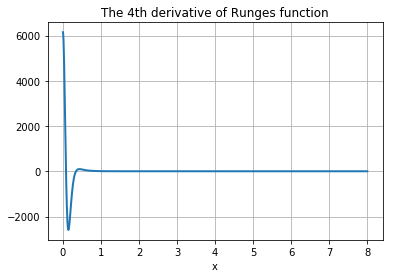

In [7]:
# Plot the 4th derivate of Runge's function:
def df4(x):
    return 6144*(1280*x**4-160*x**2+1)/((1+16*x**2)**5)
x = linspace(0, 8, 1001)
plot(x, df4(x))
title('The 4th derivative of Runges function');
xlabel('x')

It is no surprise that the error is large and the error estimates fail (we have assumed $f^{(4)}$ almost constant for the estimates) over the interval $[0,1]$. The part of the interval where $f^{(4)}(x)$ is large has to be partitioned in significantly smaller subintervals to get an acceptable result. But how, as $f^{(4)}$ is in general not known? This is the topic of the next section. 

## Adaptive integration

Given a basic function, for example `simpson_basic`, returning an approximation $Q(a,b)$ to the integral, as well as an error estimate $\mathcal{E}(a,b)$. Based on this, we want to find a partitioning of the interval:

$$
a = X_0 < X_1 \cdots < X_m = b
$$

such that

$$
|\mathcal{E}(X_j, X_{j+1})| \approx \frac{X_{k+1}-X_k}{b-a} \cdot Tol
$$

where $Tol$ is a tolerance given by the user. In this case

$$
\text{Accumulated error over $(a,b)$} \approx \sum_{j=0}^{m-1} \mathcal{E}(X_k, X_{k+1})
   \leq \text{Tol}.
$$

Such a partitioning can be done by an recursive algorithm:

**Algorithm: Adaptive quadrature.**

Given $f$, $a$, $b$ and a user defined tolerance Tol.
* Calculate $Q(a,b)$ and $\mathcal{E}(a,b)$.

* **if** $|\mathcal{E}(a,b)| \leq \text{Tol}$:

    * Accept the result, return $Q(a,b) + \mathcal{E}(a,b)$ as an approximation to $I(a,b)$.


* **else**:

    * Let $c=(a+b)/2$, and repeat the process on each of the subintervals $[a,c]$ and $[c,b]$, with tolerance  $\text{Tol}/2$.


* Sum up the accepted results from each subinterval.



### Implementation

The adaptive algorithm is implemented below with `simpson_basic` as the basic quadrature routine. 
The function `simpson_adaptive` is a recursive function, that is a function that calls itself.
To avoid it to do so infinitely many times, an extra variable `level` is introduced, this will increase by one for each time the function calls itself. If `level` is over some maximum value, the result is returned, and a warning printed.

In [8]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.
    
    # The nodes 
    c = 0.5*(a+b)
    d = 0.5*(a+c)
    e = 0.5*(c+b)
    
    # Calculate S1=S_1(a,b), S2=S_2(a,b) 
    H = b-a
    S1 = H*(f(a)+4*f(c)+f(b))/6
    S2 = 0.5*H*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))/6

    error_estimate = (S2-S1)/15    # Error estimate for S2
    return S2, error_estimate

In [9]:
def simpson_adaptive(f, a, b, tol = 1.e-6, level = 0, maks_level=15):
    # Simpson's adaptive method
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    #   tol:  tolerance
    #   level, maks_level: For the recursion. Just ignore them. 
    # Output:
    #   The approximation to the integral
    
    
    Q, error_estimate = simpson_basic(f, a, b)    # The quadrature and the error estimate 
    
    # -------------------------------------------------
    # Write the output, and plot the nodes. 
    # This part is only for illustration. 
    if level == 0:
        print(' l   a           b         feil_est   tol')
        print('==============================================') 
    print('{:2d}   {:.6f}   {:.6f}   {:.2e}   {:.2e}'.format(
            level, a, b, abs(error_estimate), tol))
    
    x = linspace(a, b, 101)
    plot(x, f(x), [a, b], [f(a), f(b)], '.r')
    title('The integrand and the subintervals')
    # -------------------------------------------------
    
    if level >= maks_level:
        print('Warning: Maximum number of levels used.')
        return Q
    
    if abs(error_estimate) < tol:         # Accept the result, and return
        result = Q + error_estimate      
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5*(b+a)
        result_left  = simpson_adaptive(f, a, c, tol = 0.5*tol, level = level+1)
        result_right = simpson_adaptive(f, c, b, tol = 0.5*tol, level = level+1)
        result = result_right + result_left
    return result

**Numerical experiment 4:**
Use adaptive Simpson to find an approximation to the integral $ \int_0^5 1/(1+16x^2)dx $ using the tolerances Tol=$10^{-3}, 10^{-5}, 10^{-7}$. Compare the numerical result with the exact one.

 l   a           b         feil_est   tol
 0   0.000000   8.000000   4.25e-02   1.00e-03
 1   0.000000   4.000000   1.85e-02   5.00e-04
 2   0.000000   2.000000   5.11e-03   2.50e-04
 3   0.000000   1.000000   7.84e-04   1.25e-04
 4   0.000000   0.500000   6.41e-04   6.25e-05
 5   0.000000   0.250000   3.43e-05   3.13e-05
 6   0.000000   0.125000   1.21e-06   1.56e-05
 6   0.125000   0.250000   1.31e-06   1.56e-05
 5   0.250000   0.500000   7.82e-07   3.13e-05
 4   0.500000   1.000000   1.45e-05   6.25e-05
 3   1.000000   2.000000   1.40e-05   1.25e-04
 2   2.000000   4.000000   8.29e-06   2.50e-04
 1   4.000000   8.000000   4.33e-06   5.00e-04

Numerical solution = 0.384903, exact solution = 0.384889

Tolerance = 1.0e-03, error = 1.343e-05


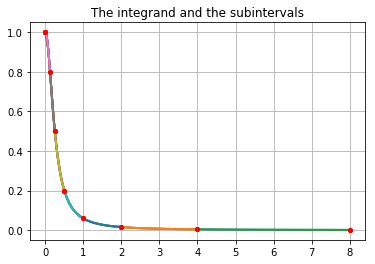

In [10]:
# Test: The adaptive Simpson's method
def f(x):                               # Integrand       
    return 1/(1+(4*x)**2)
a, b = 0, 8                             # Integration interval
I_exact = 0.25*(arctan(4*b)-arctan(4*a)) # Exact integral
tol = 1.e-3                             # Tolerance
# Apply the algorithm
result = simpson_adaptive(f, a, b, tol=tol)
# Print the result and the exact solution 
print('\nNumerical solution = {:8f}, exact solution = {:8f}'
      .format(result, I_exact))
# Compare the measured error and the tolerance
err = I_exact - result
print('\nTolerance = {:.1e}, error = {:.3e}'.format(tol, abs(err)))

## Other quadrature formulas
Simpson's rule is only one example of quadrature rules derived from polynomial interpolations. There are many others, and the whole process of deriving the methods, do error analysis, develope error estimates and adaptive algorithms can be repeated. 

Let us just conclude with a few other popular classes of methods: 

[Newton-Cotes formulas](https://en.wikipedia.org/wikTi/Newton–Cotes_formulas). These are based on equidistributed nodes. Both the  Trapezoidal rule and Simpson's rule  are examples of closed Newton-Cotes methods, the midpoint rule is an example of an open one. 

*Gauss-Legendre quadrature*: For the standard interval $[-1,1]$ choose the nodes as the zeros of the  polynomial of degree $m$:

$$
L_m(t) = \frac{d^m}{dt^m}(t^2-1)^m.
$$

These are of precision $d=2m-1$, which is the best result possible with $m$ nodes. The midpoint rule is an example of a Gauss-Legendre quadrature with $m=1$.